In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import statistics

from recommenders.datasets import movielens
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from lightgbm import LGBMRegressor

In [2]:
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df = df[["userId", "movieId", "rating"]]

100%|██████████| 4.81k/4.81k [00:02<00:00, 1.66kKB/s]


In [3]:
#ma hoa du lieulieu
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])


In [4]:
#chuan hoa du lieu
scaler = StandardScaler()
df[["userId_enc", "movieId_enc"]] = scaler.fit_transform(df[["userId_enc", "movieId_enc"]])

In [5]:
#xao tron du lieu
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
X = df[["userId_enc", "movieId_enc"]]
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
#huan luyen mo hinh
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2
[LightGBM] [Info] Start training from score 3.530387


In [8]:
#danh gia mo hinh
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | MSE: {mse:.4f}")


RMSE: 1.0230 | MAE: 0.8223 | MSE: 1.0465


In [15]:
#chay thuc nghiem 10 lan
rmse_list = []
mae_list = []
mse_list = []
time_train = []
time_test = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    st = time.time()
    model = LGBMRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    et = time.time() - st
    time_train.append(et)

    st = time.time()
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    et = time.time() - st
    time_test.append(et)
    
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    
    print(f"Lần {i+1}: RMSE = {rmse:.4f} | MAE = {mae:.4f} | MSE = {mse:.4f}")

mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)

print(f"\nTrung bình sau 10 lần:")
print(f"RMSE trung bình: {mean_rmse:.4f}")
print(f"MAE trung bình: {mean_mae:.4f}")
print(f"MSE trung bình: {mean_mse:.4f}")
Ketqua_timeTrain = statistics.mean(time_train)
print('time_train' ,Ketqua_timeTrain)
Ketqua_timeTest = statistics.mean(time_test)
print('time_test' ,Ketqua_timeTest)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2
[LightGBM] [Info] Start training from score 3.530362
Lần 1: RMSE = 1.0286 | MAE = 0.8279 | MSE = 1.0580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2
[LightGBM] [Info] Start training from score 3.530413
Lần 2: RMSE = 1.0290 | MAE = 0.8291 | MSE = 1.0588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the ov

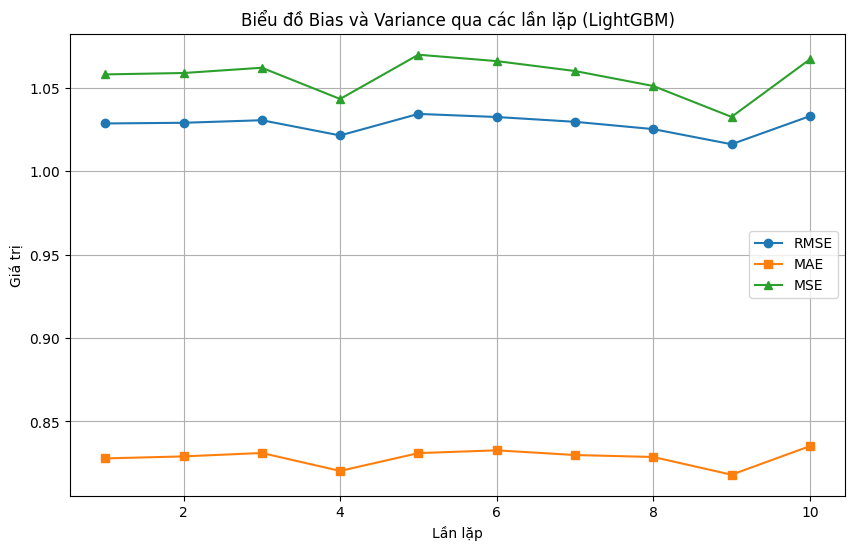

In [16]:
iterations = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_list, marker='o', label='RMSE')
plt.plot(iterations, mae_list, marker='s', label='MAE')
plt.plot(iterations, mse_list, marker='^', label='MSE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Bias và Variance qua các lần lặp (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Lưu mô hình thành công")

Lưu mô hình thành công
